In [ ]:
#Manipulacion de los datos 
import pandas as pd
import numpy as np 

#Visualizacion de los datos 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.style.use('ggplot')

#No presentar advertencias 
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargamos los datos 
pd.set_option('display.max_column', None) #Visualizamos todas las columnas
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Exploracion de datos**

In [ ]:
#visualizamos la cantidad de variables y de registro 
df.shape

(569, 33)

In [ ]:
#Visualizamos los nombres de las columnas
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Eliminamos las columnas id y unnamed ya que no la utilizaremos 
df = df.drop(["id", 'Unnamed: 32'],axis= 1)

In [ ]:
#Realizamos una estadistica descriptiva de nuestros datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


**Correlación de Pearson**

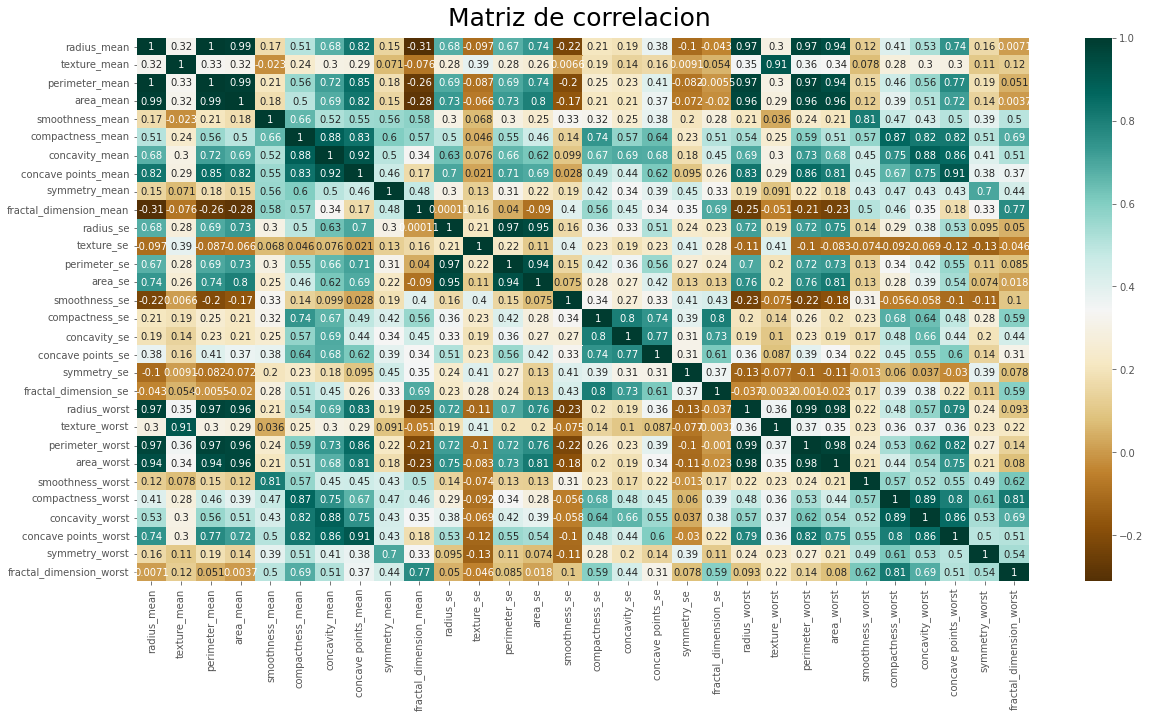

In [ ]:
#Matriz de correlación 
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), cmap='BrBG', annot = True)
heatmap.set_title('Matriz de correlacion ', fontdict={'fontsize':25}, pad= 12);

Vamos a saber cúantos valores para el tipo de cancer malgino y benigno 

In [ ]:
df.diagnosis.value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
print("Total numero de diagnosticos ", str(df.shape[0]), ", ", df.diagnosis.value_counts()['B'], "Beningno y Maligno son:" , 
      df.diagnosis.value_counts()['M'])

Total numero de diagnosticos  569 ,  357 Beningno y Maligno son: 212


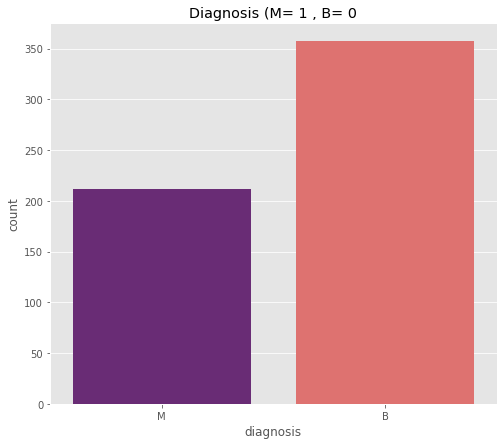

In [ ]:
#Vamos a visualizar la variable diagnosis 
plt.figure(figsize= (8,7))
sns.countplot(x ="diagnosis", data=df , palette ='magma')
plt.title("Diagnosis (M= 1 , B= 0")
plt.show()

In [ ]:
# Convertimos la variable categoria en numerico 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)


In [ ]:
scaled_data.shape , x_pca.shape

((569, 31), (569, 2))

In [ ]:
pca_df = pd.DataFrame(data = x_pca , columns = ['principal component 1', 'Principal component 2'])
pca_df

,principal component 1,Principal component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579
...,...,...
564,6.593983,-3.454947
565,4.024833,-3.556006
566,1.530077,-1.958871
567,10.405008,1.849078


**Visualizando el PCA**

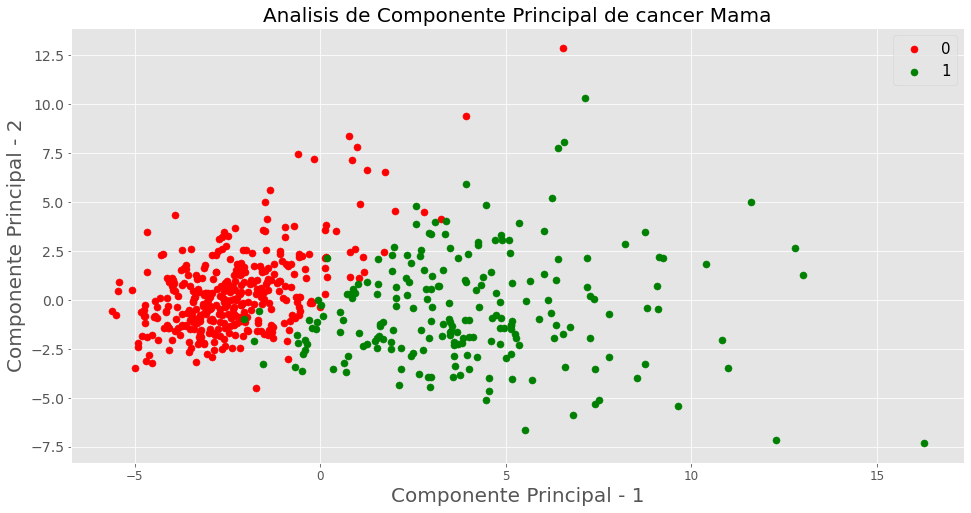

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 14)
plt.xlabel('Componente Principal - 1', fontsize= 20)
plt.ylabel('Componente Principal - 2', fontsize= 20)
plt.title("Analisis de Componente Principal de cancer Mama", fontsize= 20)
targets = [0, 1]
colors= [ 'r', 'g']
for target , color in zip(targets, colors):
  indicesToKeep = df['diagnosis'] == target
  plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
              , pca_df.loc[indicesToKeep, 'Principal component 2'], c = color ,  s = 50)
plt.legend(targets, prop={'size': 15})
  



**Dividimos los datos en etiquetas**

In [ ]:
x = df.drop('diagnosis' , axis = 1)
y = df['diagnosis']


In [ ]:
len(x.columns)

30

**Dividimos los datos en entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape )

Shape of training set: (455, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


StandardScaler estandariza una funcion restando la media y luego escalando a la varianza de la unidad (la varianza de la unidad significa dividir todos los valores por la desviación estándar).

**1) Logisic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#Encontramos el modelo 
LR.fit(X_train , y_train)

#Hacemos las predicciones 
Y_LR = LR.predict(X_test)

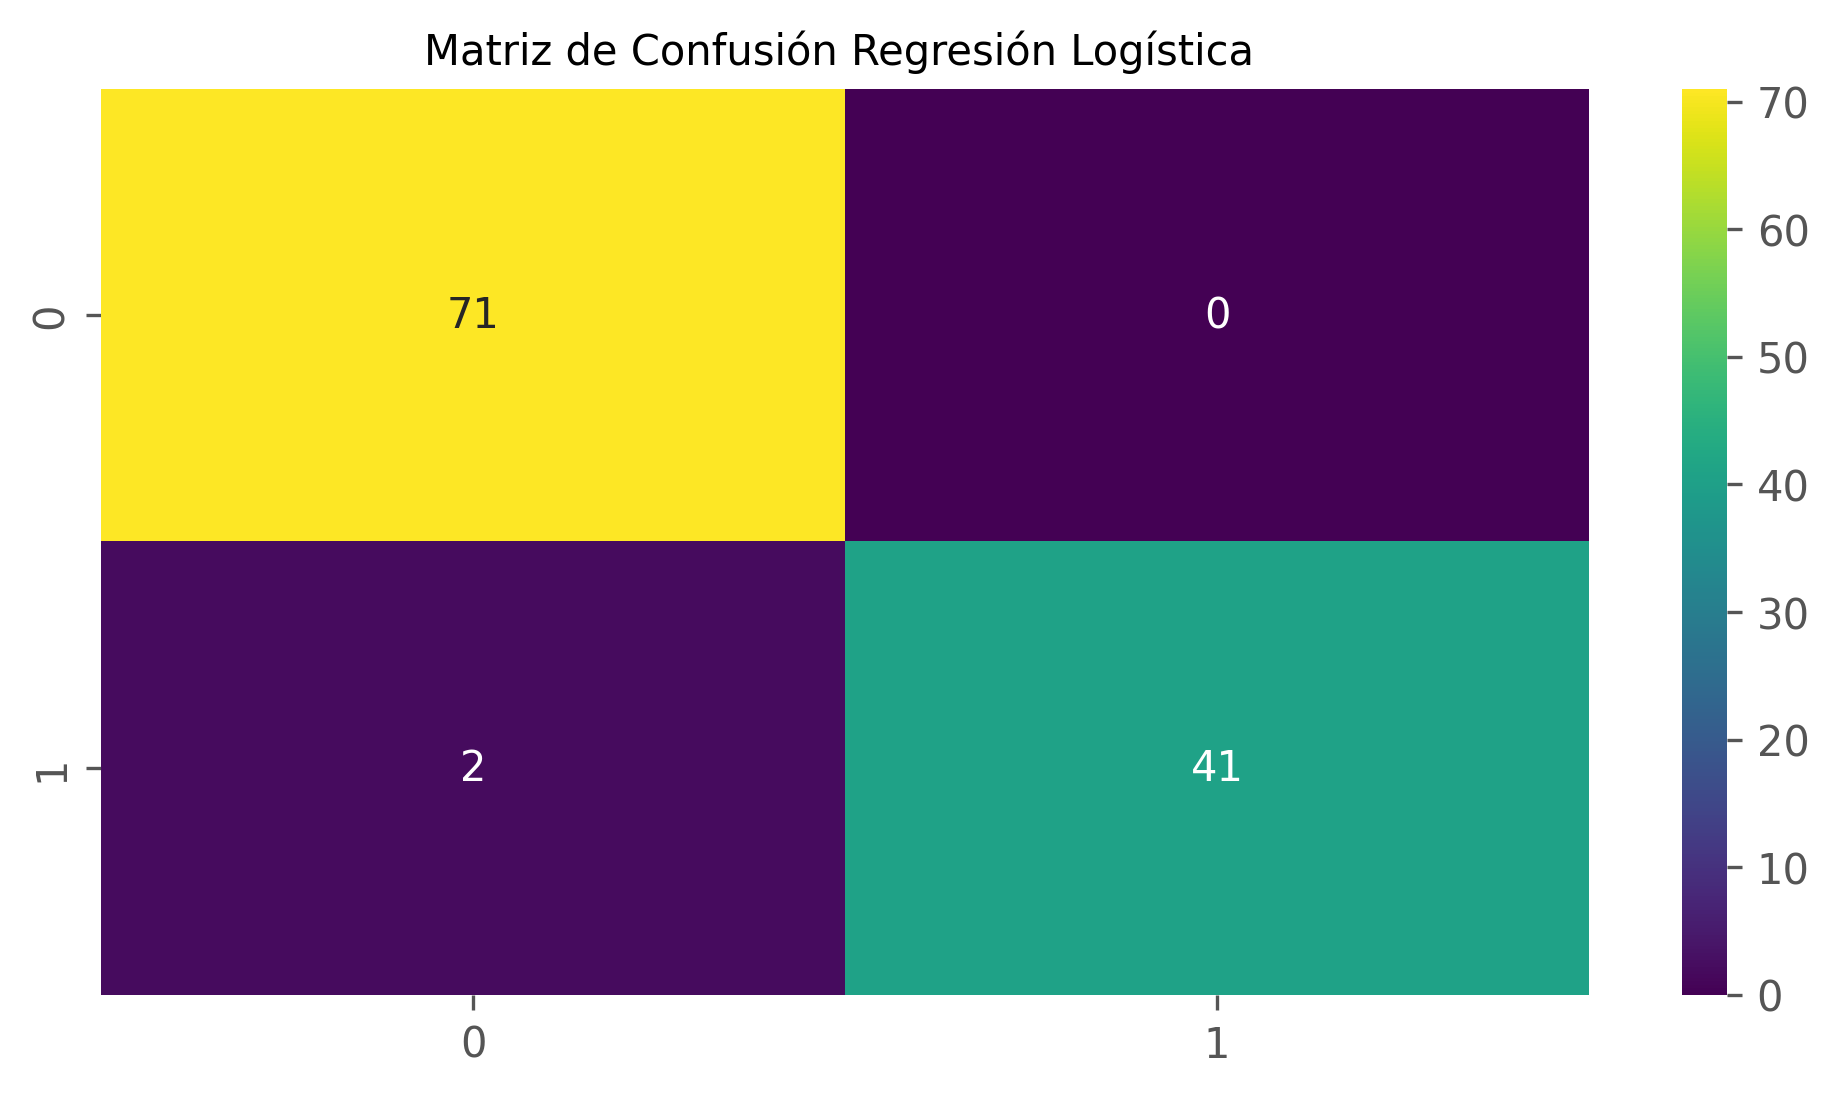

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de Confusión Regresión Logística ", fontsize = 10)
sns.heatmap(confusion_matrix(y_test, Y_LR), annot = True , cmap = 'viridis', fmt= '.0f')

plt.show()

In [ ]:
print(classification_report(y_test , Y_LR))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score
logistica_acc = accuracy_score(y_test , Y_LR)
print("Precision del Modelo de Regresion Logistica es:", logistica_acc)


Precision del Modelo de Regresion Logistica es: 0.9824561403508771


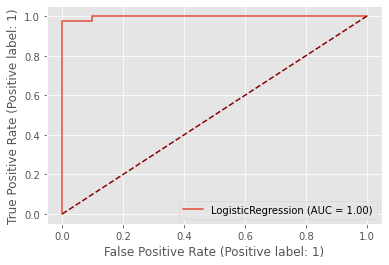

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, X_test, y_test)
plt.plot([0,1], [0,1], color = 'darkred', linestyle= '--')
plt.show()

**2) KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Encontramos los mejores vecinos

no_of_neighborns_and_accuracies = {}
for i in range(1, 15):
  knn = KNeighborsClassifier(n_neighbors= 1)
  knn.fit(X_train, y_train)
  Y_knn = knn.predict(X_test)
  score= accuracy_score(Y_knn , y_test)
  no_of_neighborns_and_accuracies[i] = score
  

In [ ]:
no_of_neighborns_and_accuracies

{1: 0.9210526315789473,
 2: 0.9210526315789473,
 3: 0.9210526315789473,
 4: 0.9210526315789473,
 5: 0.9210526315789473,
 6: 0.9210526315789473,
 7: 0.9210526315789473,
 8: 0.9210526315789473,
 9: 0.9210526315789473,
 10: 0.9210526315789473,
 11: 0.9210526315789473,
 12: 0.9210526315789473,
 13: 0.9210526315789473,
 14: 0.9210526315789473}

In [ ]:
knn = KNeighborsClassifier( n_neighbors=3)
knn.fit(X_train , y_train)

Y_knn = knn.predict(X_test)

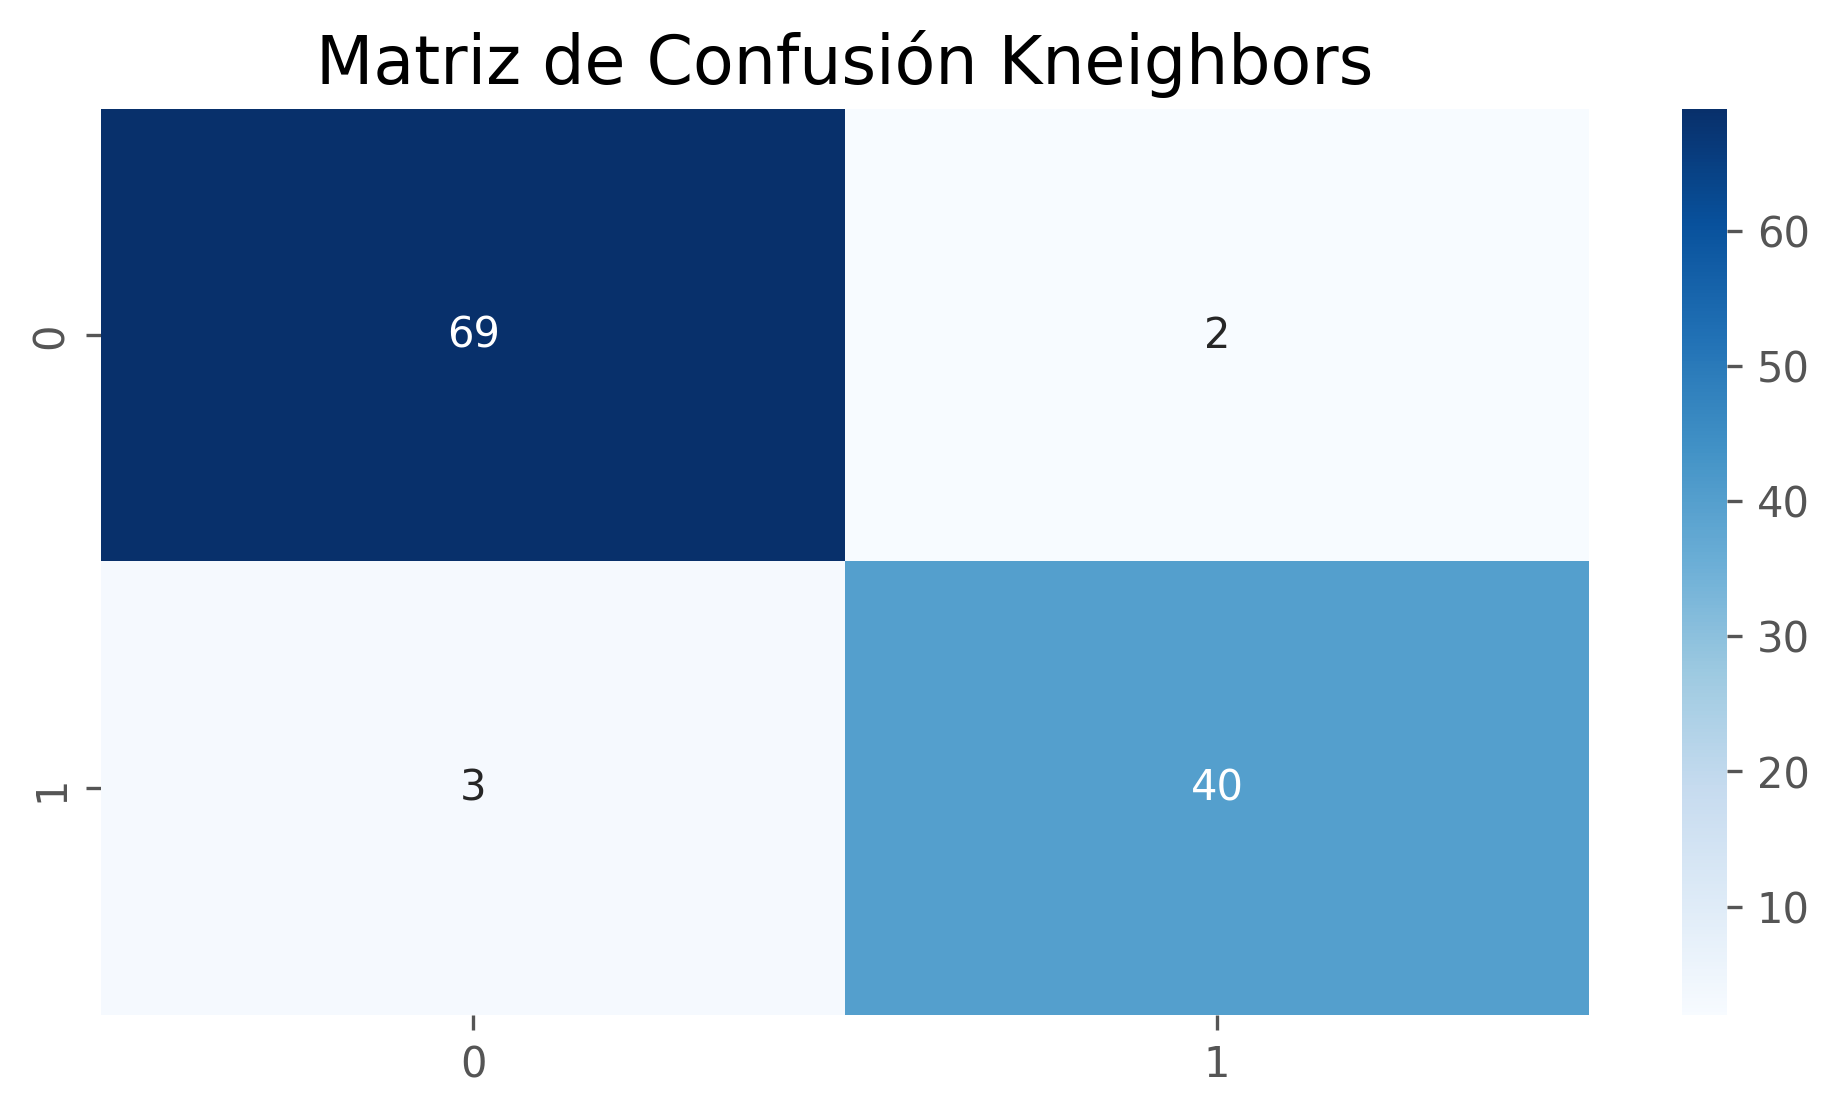

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de Confusión Kneighbors", fontsize= 16)
sns.heatmap(confusion_matrix(y_test , Y_knn), annot = True , cmap = 'Blues', fmt = '.0f')

plt.show()

In [ ]:
print(classification_report(y_test , Y_knn))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_test, Y_knn)
print("Precisión del Modelo de KNN es:", KNN_acc)


Precision del Modelo de KNN es: 0.956140350877193


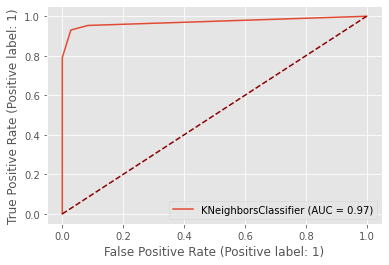

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve ( knn, X_test, y_test)
plt.plot([0,1], [0,1], color = 'darkred' ,linestyle ='--')

plt.show()

**3)Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion= 'gini')

dtc.fit(X_train, y_train)
Y_dtc= dtc.predict(X_test)


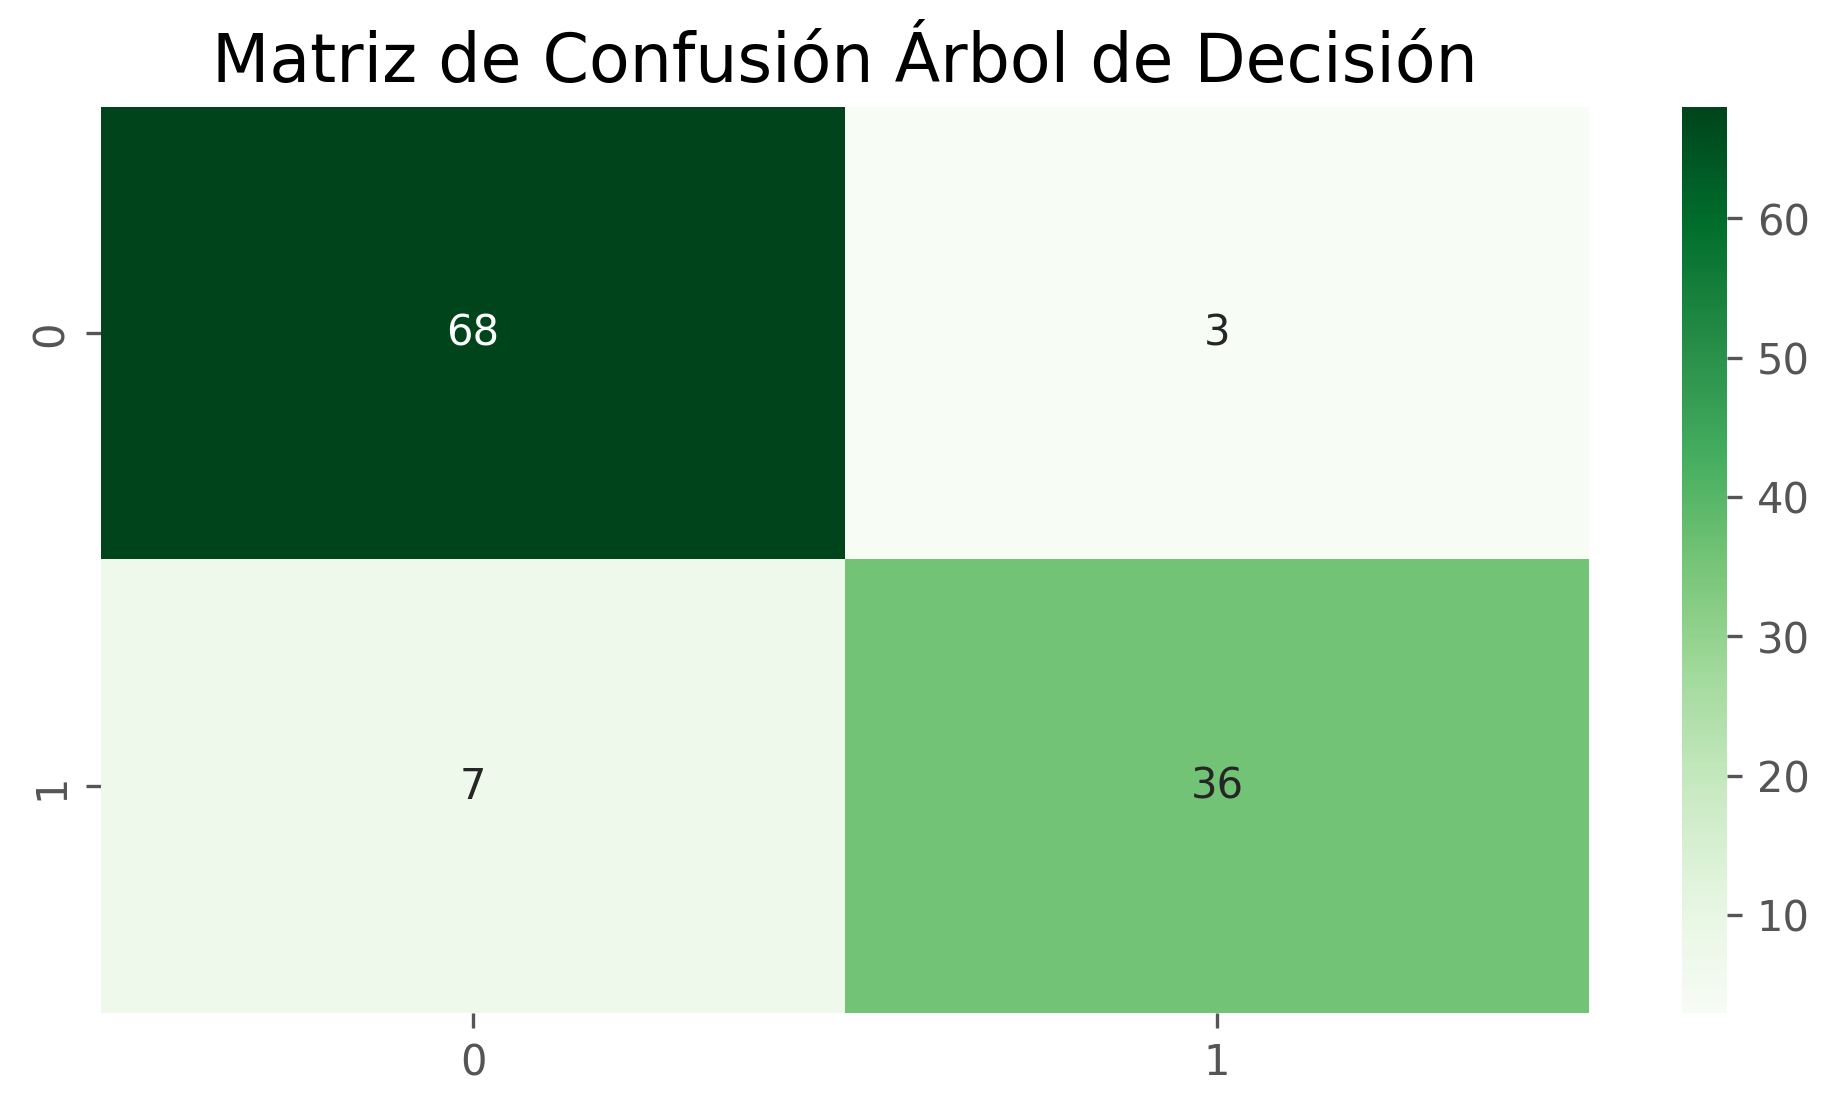

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize= (8,4),dpi=300)
plt.title('Matriz de Confusión Árbol de Decisión', fontsize= 16)
sns.heatmap(confusion_matrix(y_test , Y_dtc ), annot = True , cmap = 'Greens', fmt= '.0f')

plt.show()


In [ ]:
print(classification_report(y_test, Y_dtc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [ ]:
from sklearn.metrics import accuracy_score

Tree_acc = accuracy_score(y_test , Y_dtc)
print('Precisión del modelo de Árbol de Decisión es:', Tree_acc)

Precision del modelo de arbol de Decision es: 0.9122807017543859


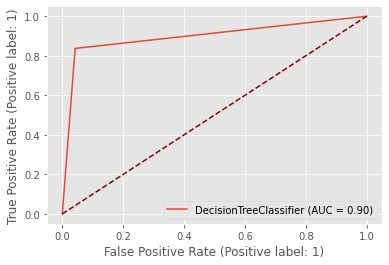

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc , X_test , y_test)
plt.plot([0,1], [0,1], color ='darkred', linestyle ='--')
plt.show()

**4)Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion= 'entropy')

rfc.fit(X_train , y_train)

y_rfc = rfc.predict(X_test)



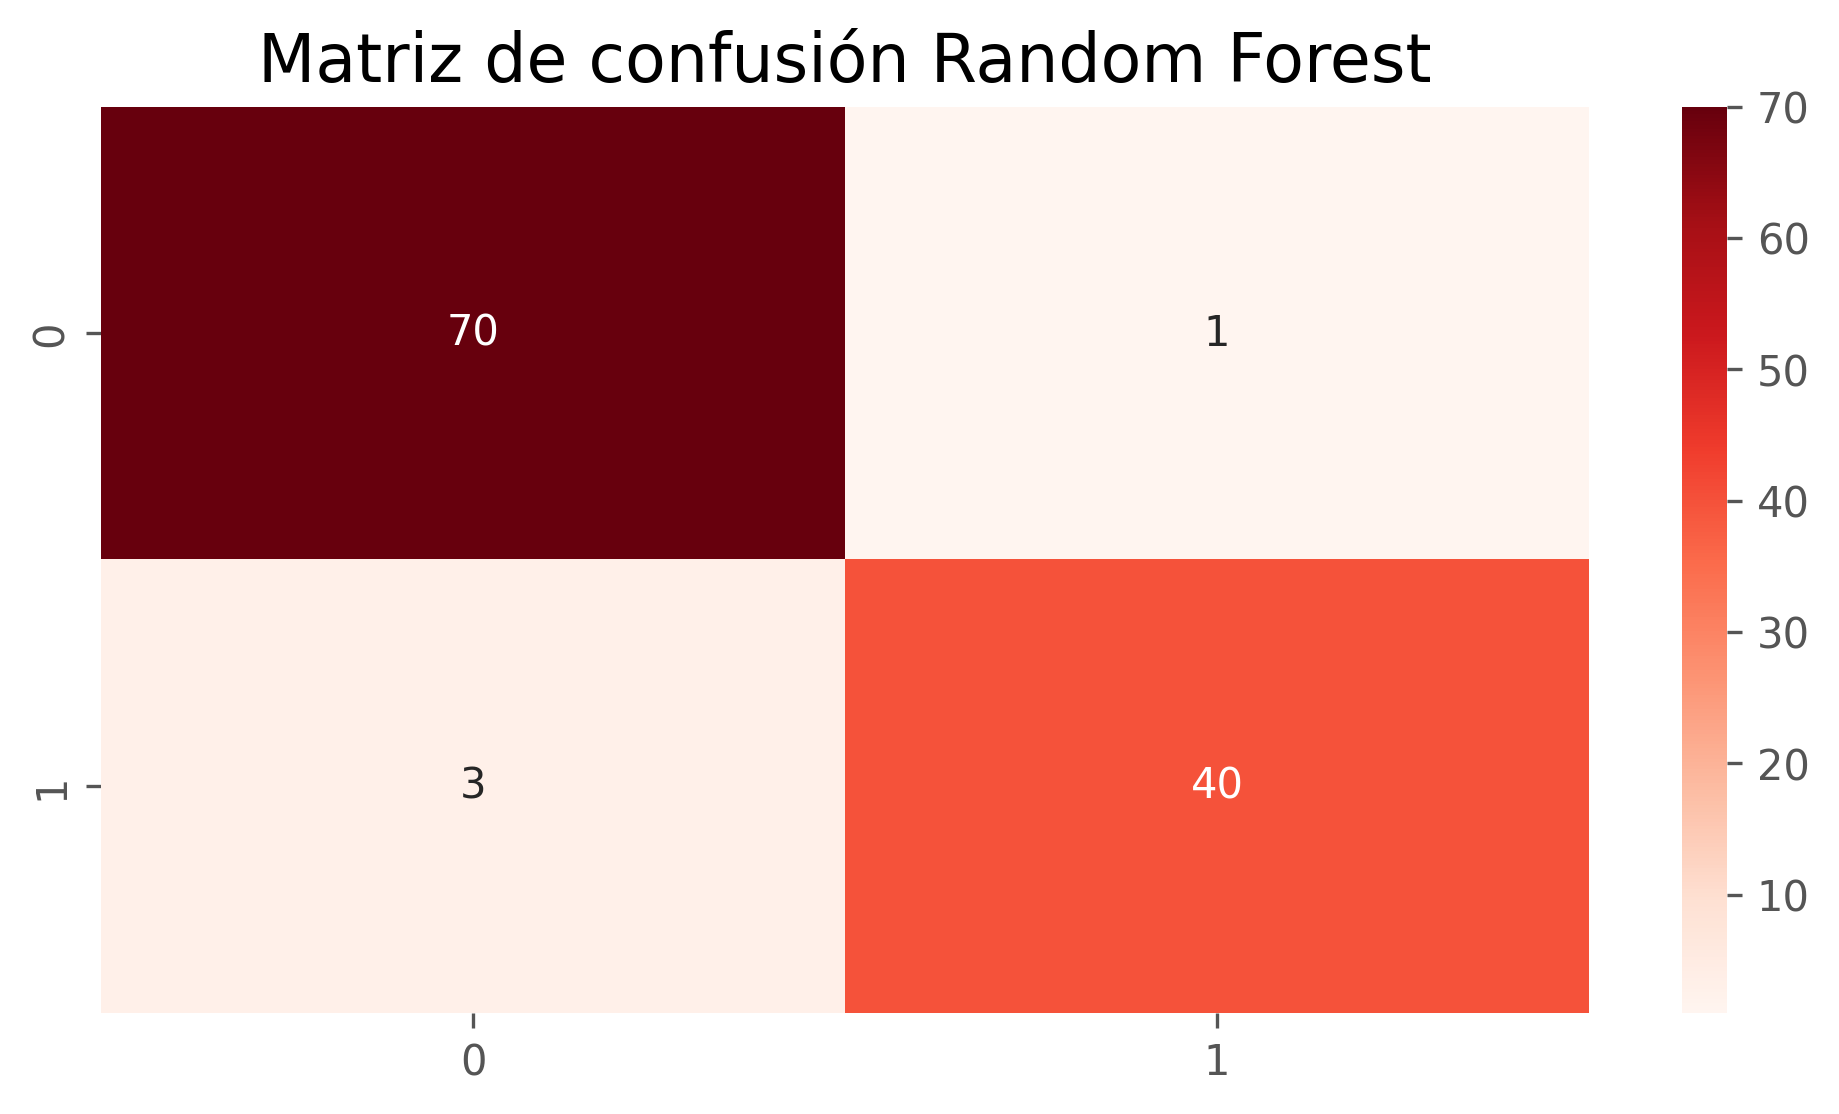

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de confusión Random Forest", fontsize= 16)
sns.heatmap(confusion_matrix(y_test, y_rfc), annot = True , cmap = 'Reds', fmt = '.0f')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test , y_rfc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score
Random_Fores_acc= accuracy_score(y_test, y_rfc)
print("Presicion del Modelo de Rnadom Forest es:", Random_Fores_acc)


Presicion del Modelo de Rnadom Forest es: 0.9649122807017544


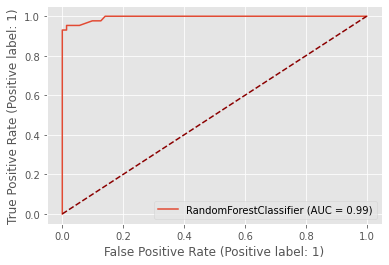

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc , X_test , y_test)
plt.plot([0,1], [0,1], color='darkred', linestyle ='--')
plt.show()

**5)Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train , y_train)
Y_svc = svc.predict(X_test)


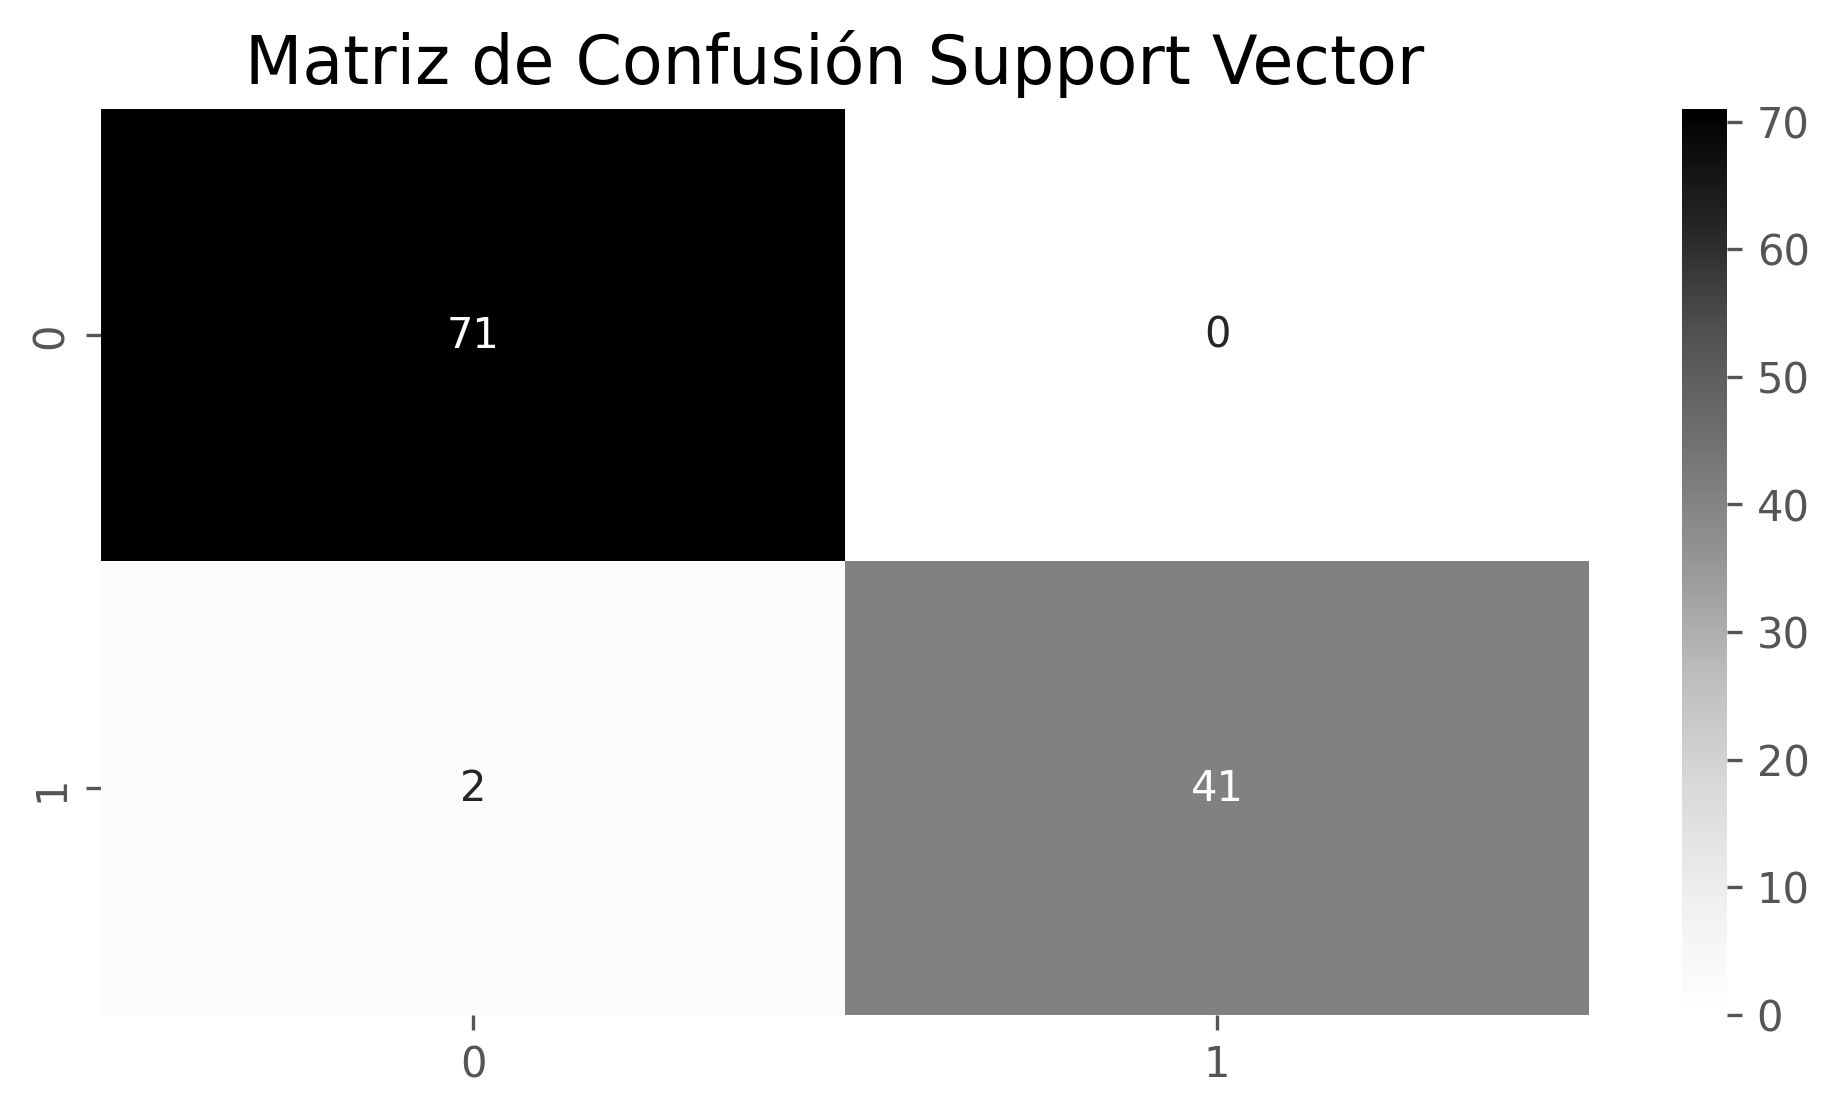

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de Confusión Support Vector ", fontsize= 16)
sns.heatmap(confusion_matrix(y_test, Y_svc), annot = True, cmap = 'Greys', fmt = '.0f')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score

SVC_acc = accuracy_score(y_test, Y_svc)

print("Precision del Modelo de Support Vector es:", SVC_acc)


Precision del Modelo de Support Vector es: 0.9824561403508771


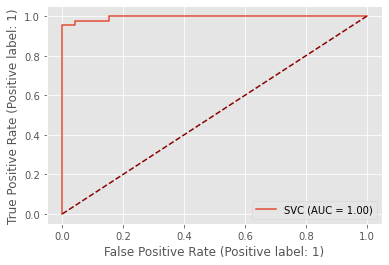

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc, X_test, y_test)
plt.plot([0,1], [0,1], color= 'darkred', linestyle='--')
plt.show()

**6) Navie Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

Y_gnb= gnb.predict(X_test)


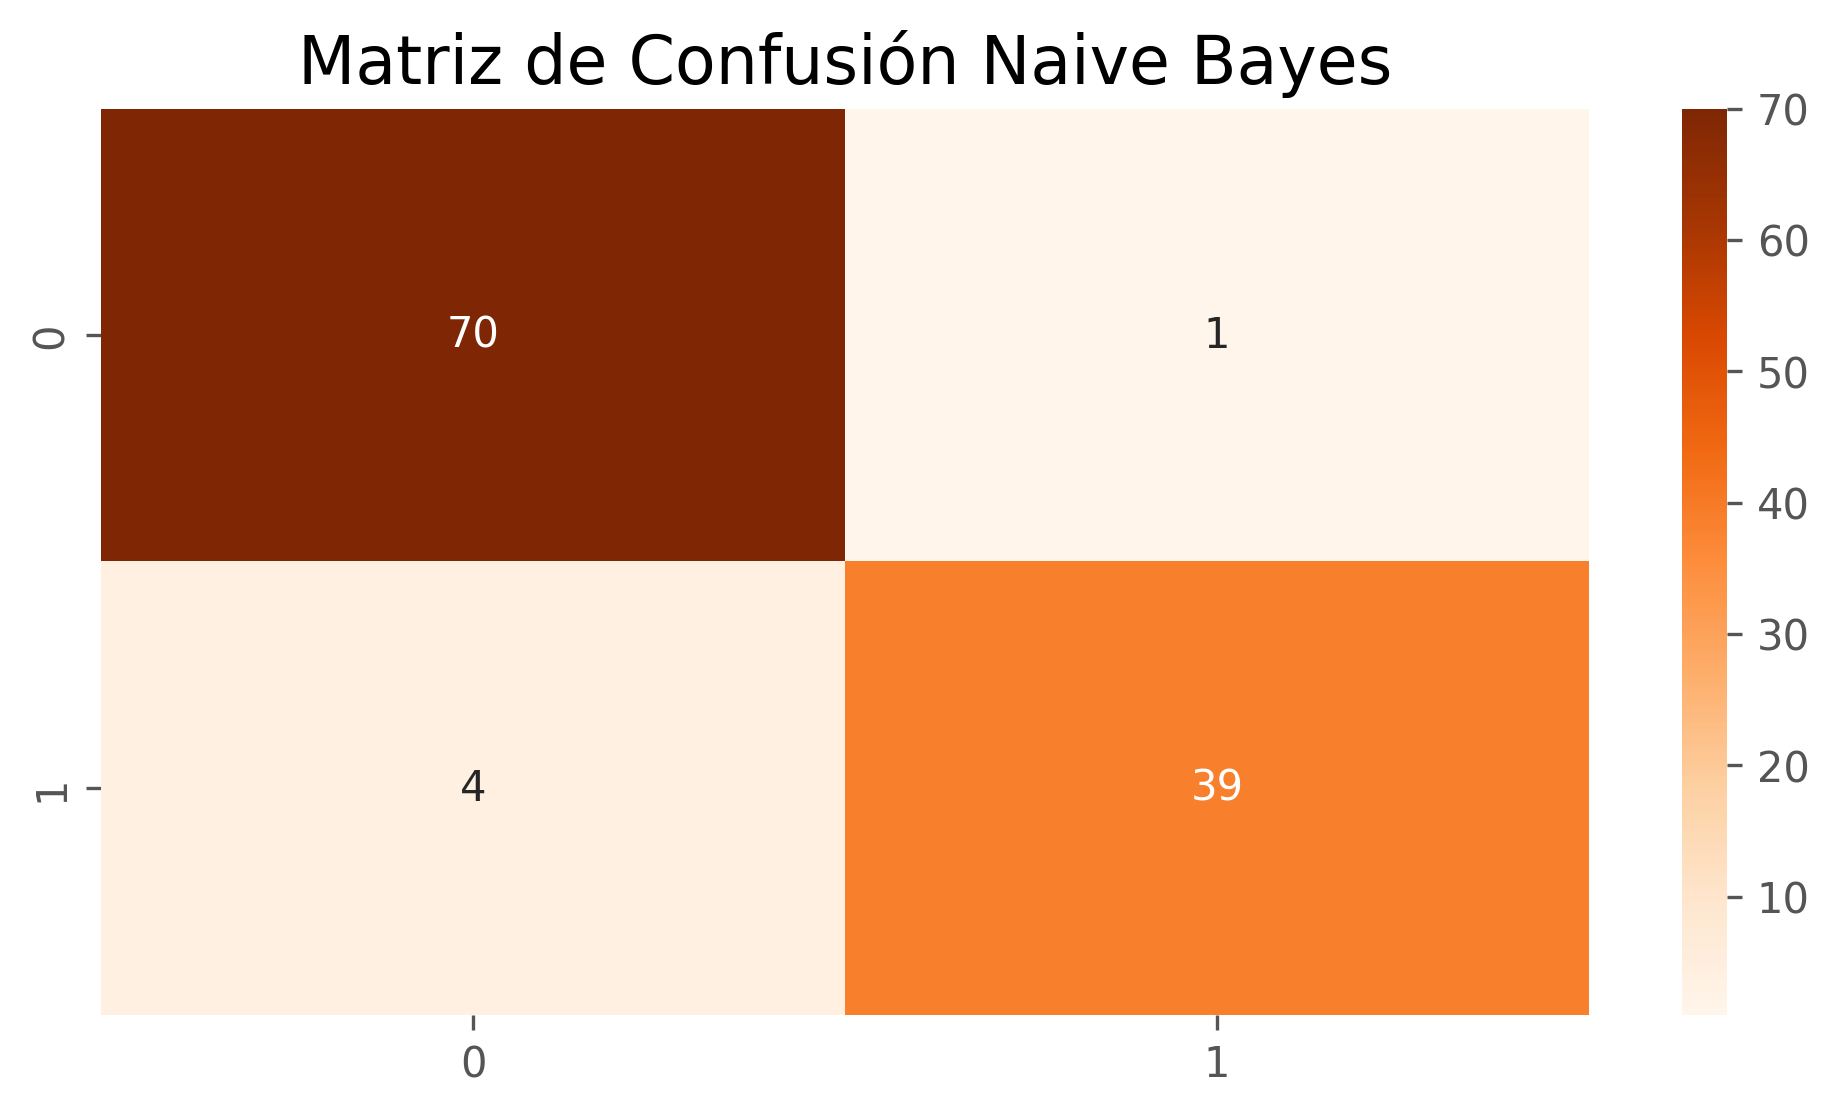

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de Confusión Naive Bayes", fontsize = 16)
sns.heatmap(confusion_matrix(y_test , Y_gnb), annot = True , cmap = 'Oranges', fmt = '.0f')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, Y_gnb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score

Gaussian_acc = accuracy_score(y_test, Y_gnb)
print("Presicion del modelo de Naive Bayes es: ", Gaussian_acc)

Presicion del modelo de Naive Bayes es:  0.956140350877193


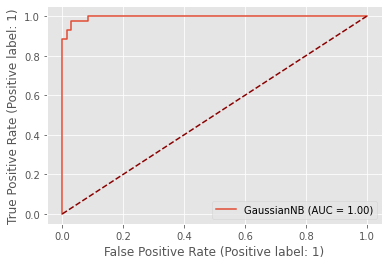

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb , X_test , y_test)
plt.plot([0,1], [0,1], color ='darkred', linestyle ='--')
plt.show()

**7) Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()

gbc.fit(X_train , y_train)
Y_gbc = gbc.predict(X_test)

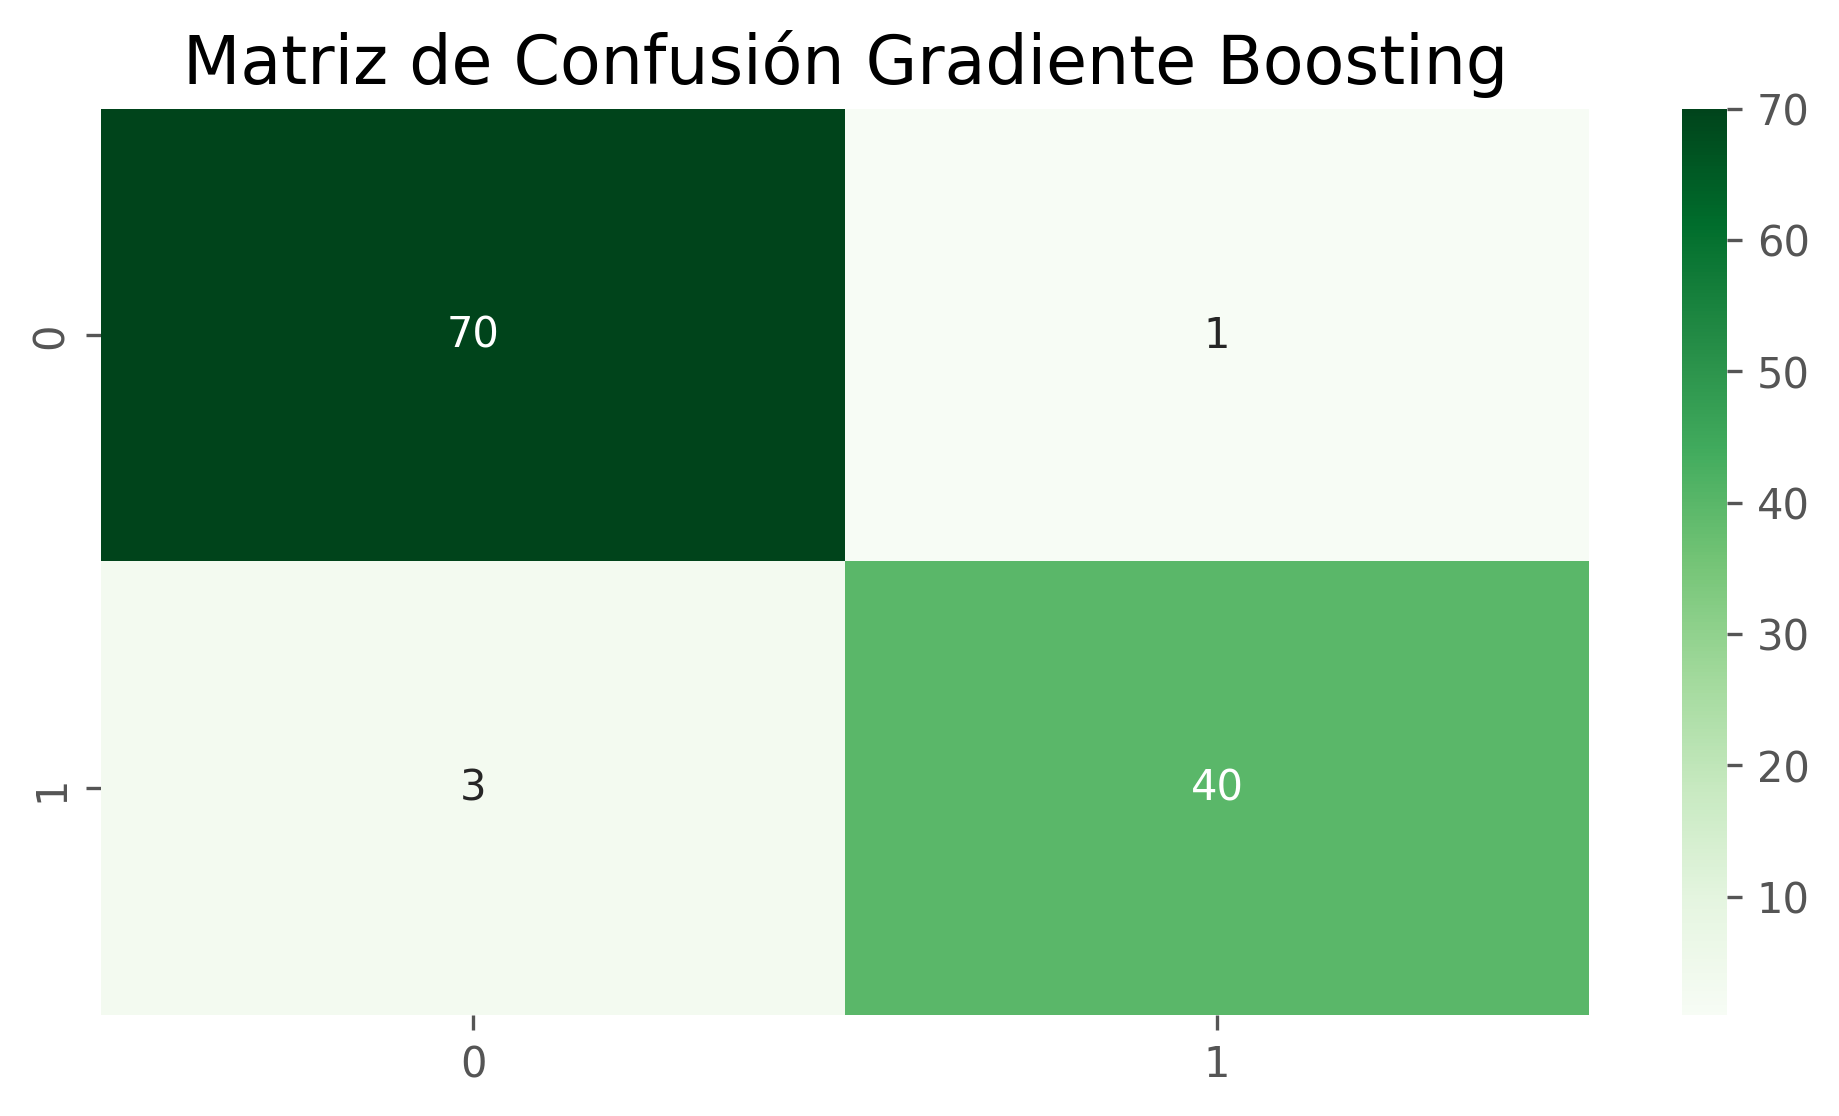

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de Confusión Gradiente Boosting", fontsize= 16)
sns.heatmap(confusion_matrix(y_test, Y_gbc), annot= True , cmap = 'Greens', fmt = '.0f')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_gbc))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score
GrandientBoosting_acc = accuracy_score(y_test , Y_gbc)

print("Precision del Modelo de Gradient Boosting es:", GrandientBoosting_acc)


Precision del Modelo de Gradient Boosting es: 0.9649122807017544


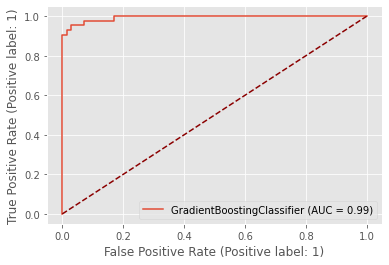

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc, X_test, y_test)
plt.plot([0,1],[0,1], color='darkred', linestyle= '--')
plt.show()

**8)Stochastic Gradient Decent**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
Y_sgdc = sgdc.fit(X_train , y_train)
Y_sgdc = sgdc.predict(X_test)


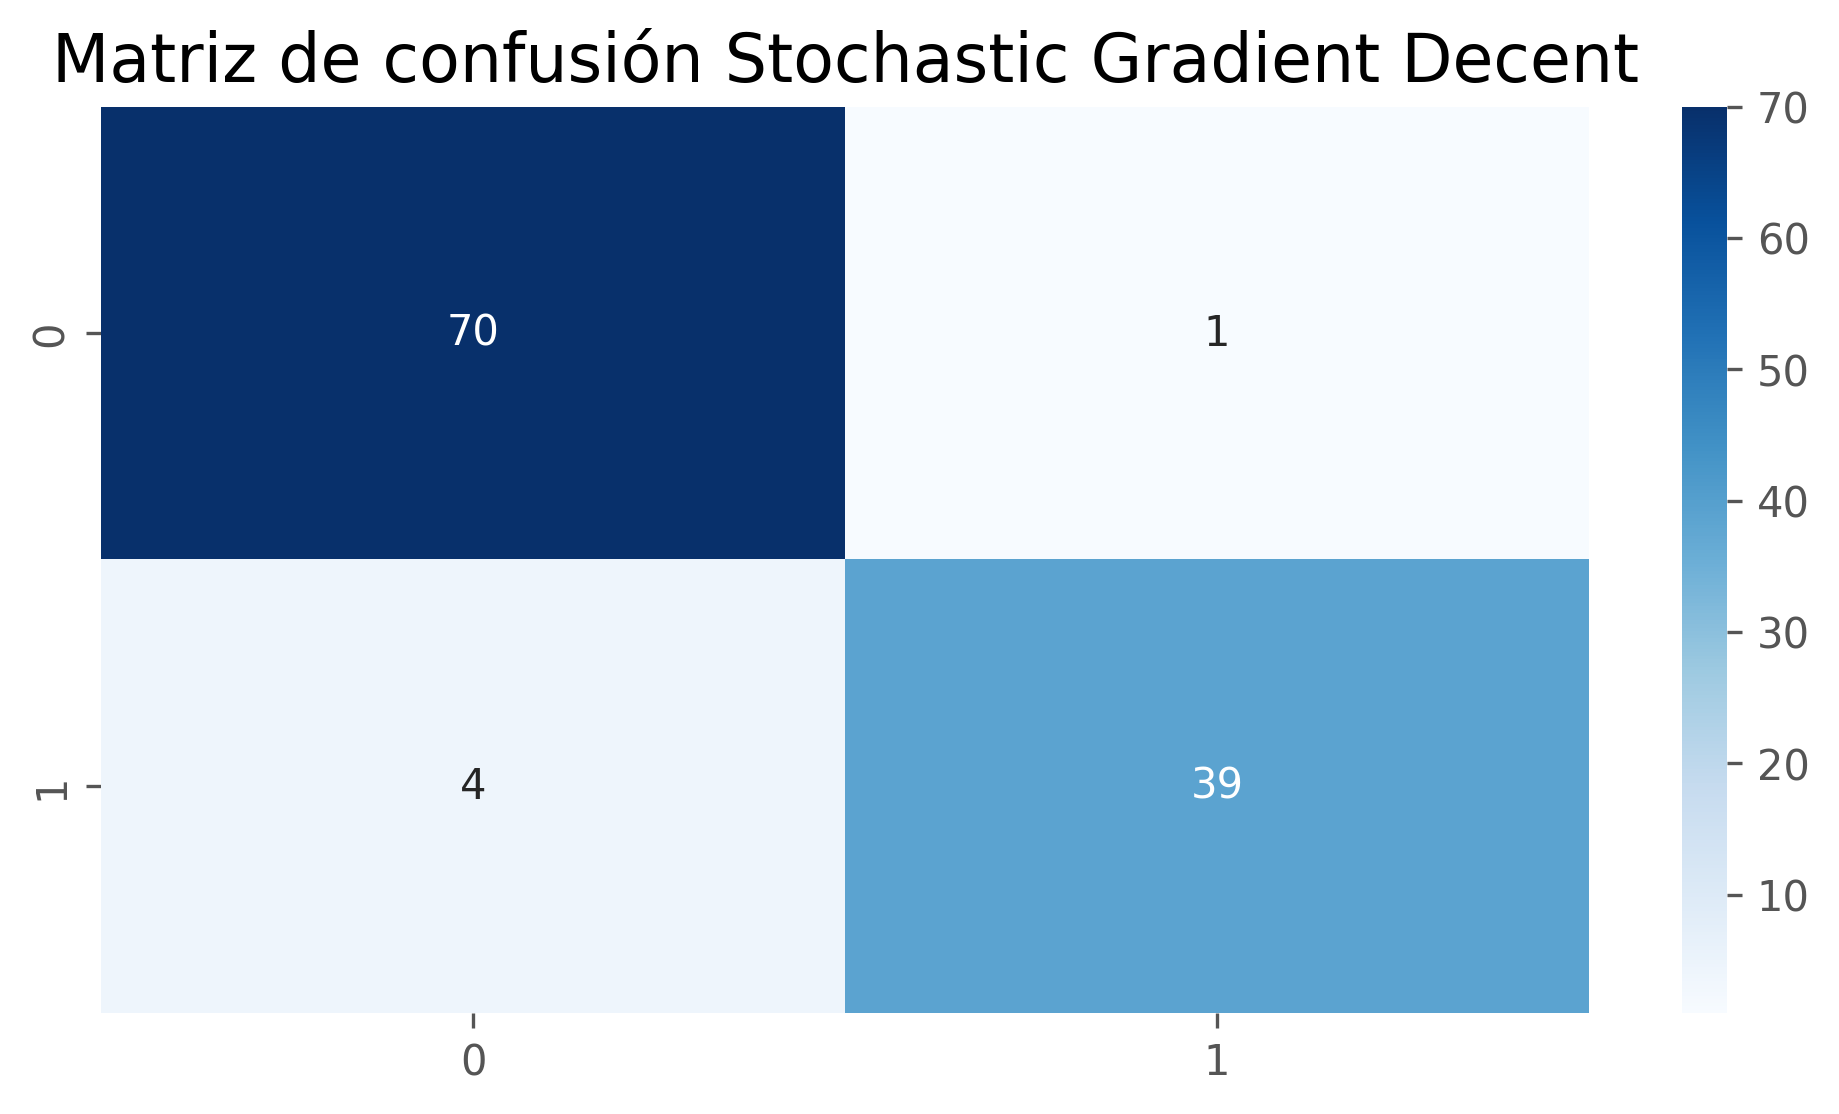

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de confusión Stochastic Gradient Decent", fontsize= 16)
sns.heatmap(confusion_matrix(y_test , Y_sgdc), annot = True , cmap ='Blues', fmt='.0f')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test , Y_sgdc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score
StochasticGradient_acc = accuracy_score(y_test , Y_sgdc)
print("Precision del Modelo de Stochastic Gradient Decent es:", StochasticGradient_acc)



Precision del Modelo de Stochastic Gradient Decent es: 0.956140350877193


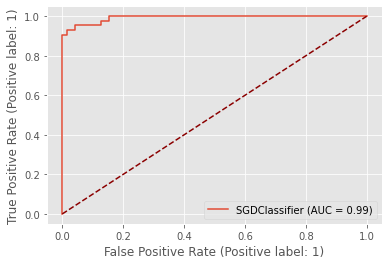

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(sgdc, X_test, y_test)
plt.plot([0,1], [0,1], color = 'darkred', linestyle ='--')
plt.show()


**9)AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

adb.fit(X_train , y_train)

Y_adb = adb.predict(X_test)


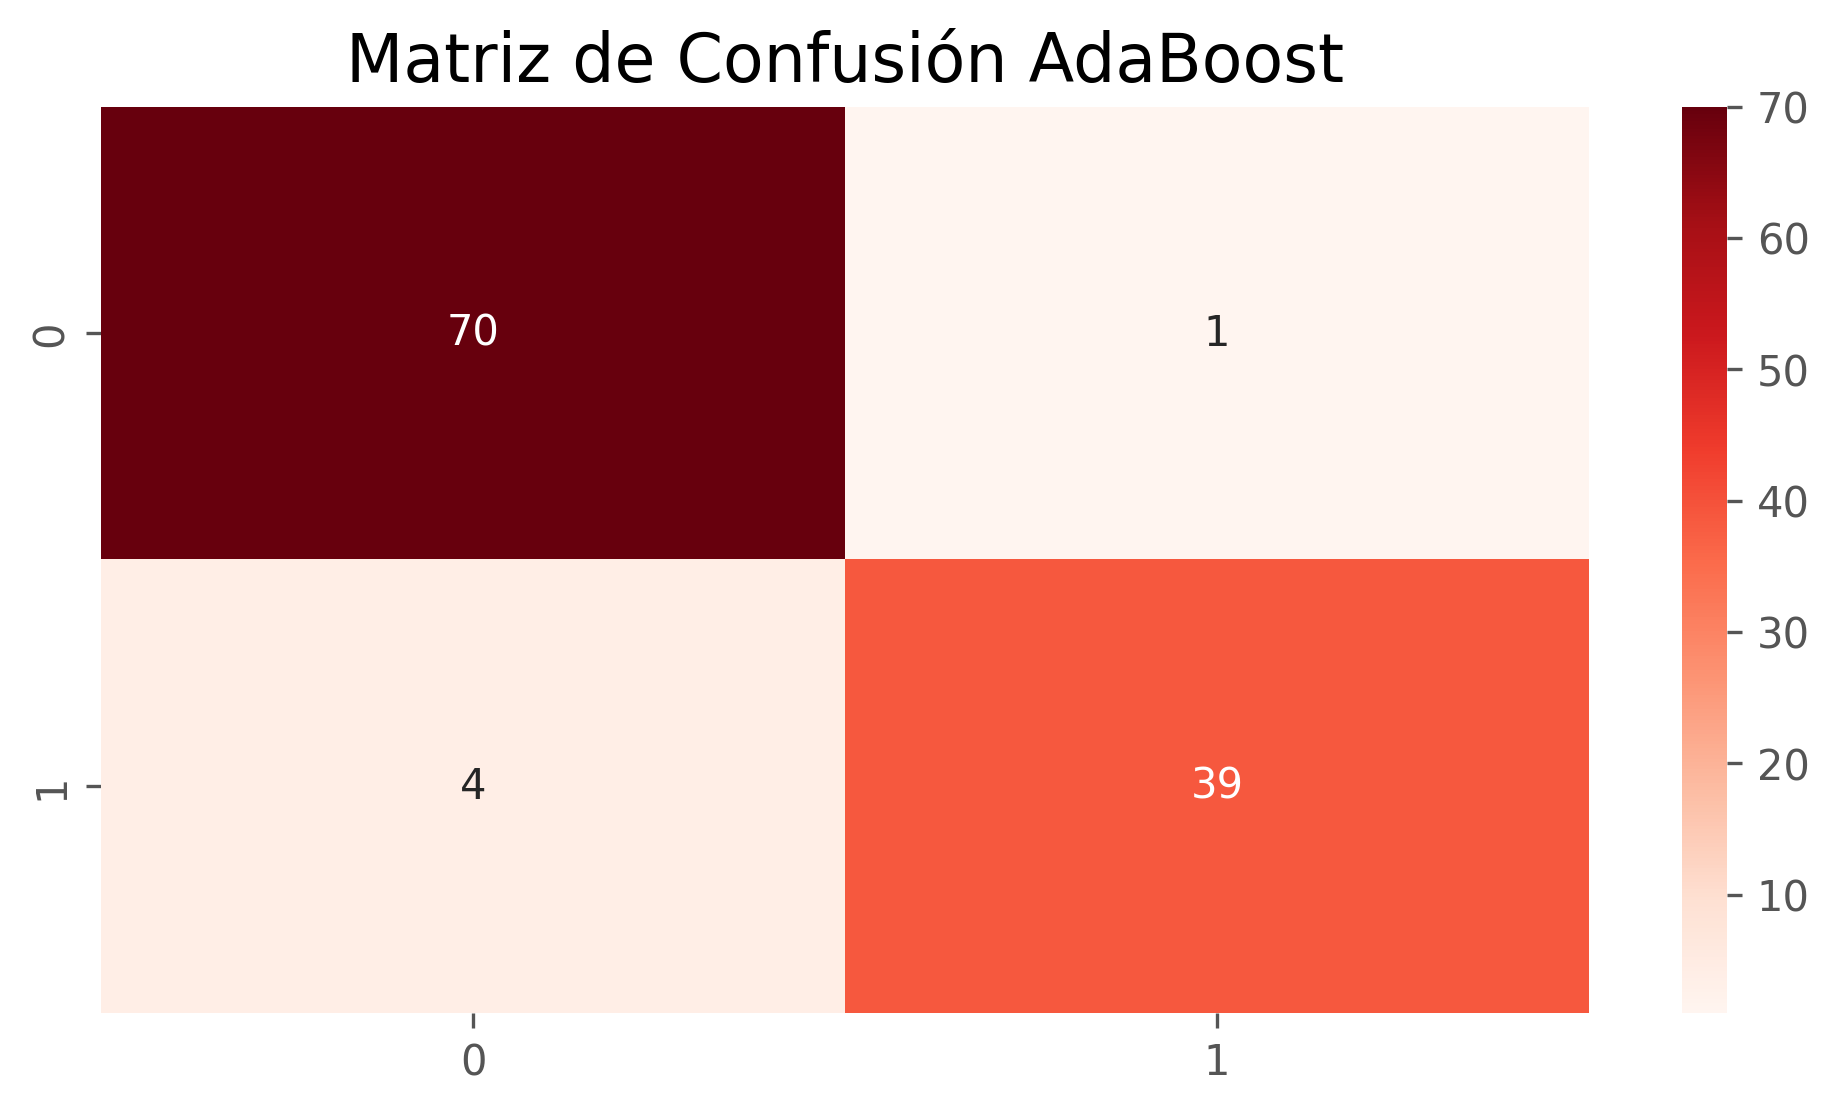

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de Confusión AdaBoost", fontsize = 16)
sns.heatmap(confusion_matrix(y_test, Y_sgdc), annot = True , cmap= 'Reds', fmt= '.0f')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test , Y_adb))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import accuracy_score
AdaBoost_acc = accuracy_score(y_test, Y_adb)
print("Precision del Modelo de Adaboost es:", AdaBoost_acc)

Precision del Modelo de Adaboost es: 0.9736842105263158


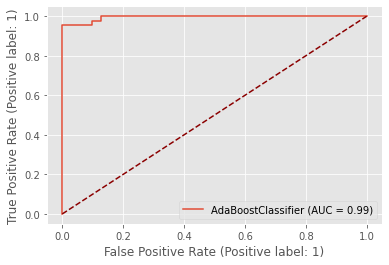

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(adb , X_test, y_test)
plt.plot([0,1],[0,1], color= 'darkred', linestyle='--')
plt.show()

**10) XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train , y_train)
Y_xgb = xgb.predict(X_test)

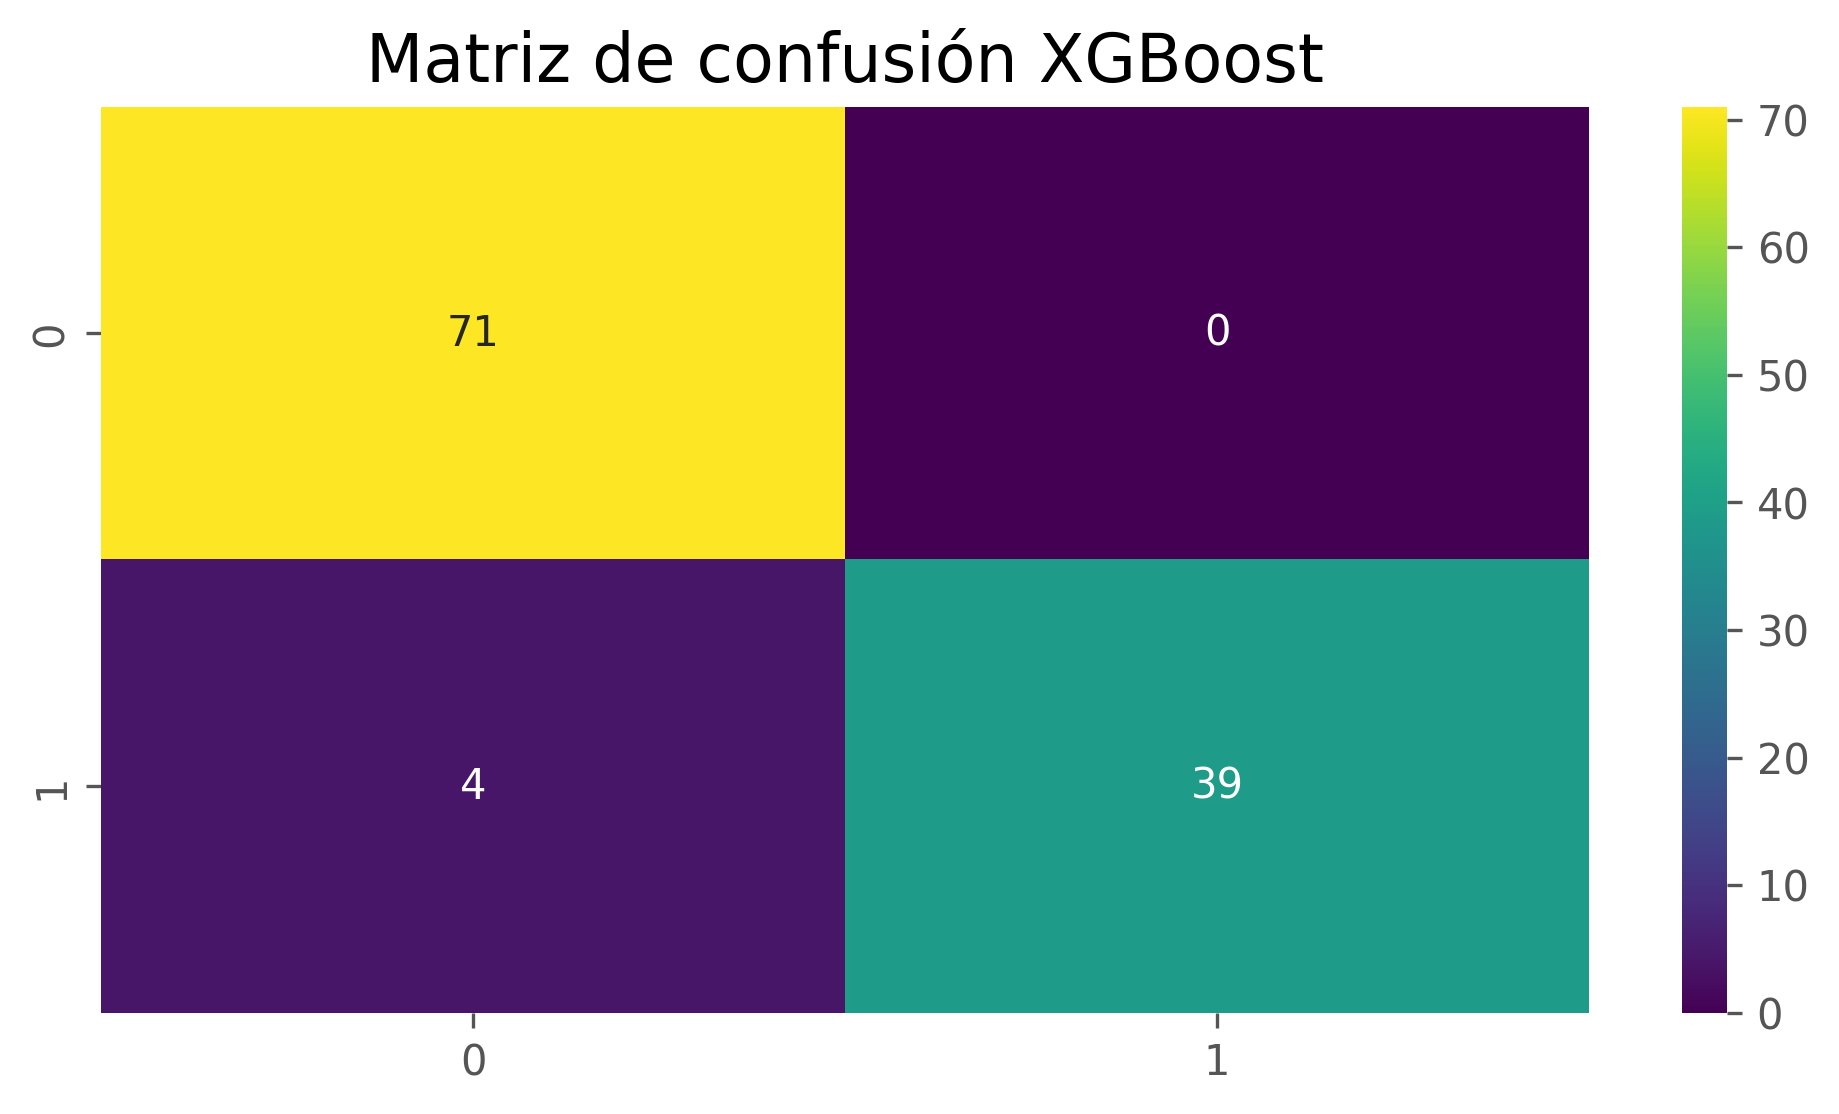

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de confusión XGBoost", fontsize= 16)
sns.heatmap(confusion_matrix(y_test, Y_xgb), annot= True , cmap = 'viridis', fmt = '.0f')
plt.show()

In [ ]:
print(classification_report(y_test, Y_xgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score
xgboost_acc = accuracy_score(y_test , Y_xgb)
print("Precision del Modelo de Xgboost es:", xgboost_acc)

Precision del Modelo de Xgboost es: 0.9649122807017544


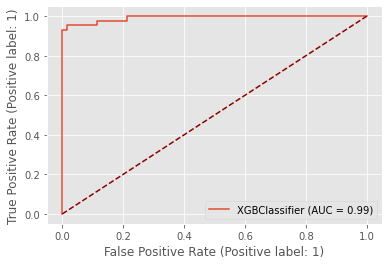

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb , X_test , y_test)
plt.plot([0,1],[0,1], color ='darkred', linestyle = '--')
plt.show()

**11) CatBoost**

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()

cb.fit(X_train , y_train)
Y_cb = cb.predict(X_test)

Learning rate set to 0.00736
0:	learn: 0.6812589	total: 55.3ms	remaining: 55.2s
1:	learn: 0.6692348	total: 62.6ms	remaining: 31.2s
2:	learn: 0.6583753	total: 69.4ms	remaining: 23.1s
3:	learn: 0.6481894	total: 76.8ms	remaining: 19.1s
4:	learn: 0.6375033	total: 84.2ms	remaining: 16.8s
5:	learn: 0.6283885	total: 91.4ms	remaining: 15.1s
6:	learn: 0.6165743	total: 98.7ms	remaining: 14s
7:	learn: 0.6064453	total: 106ms	remaining: 13.1s
8:	learn: 0.5955410	total: 113ms	remaining: 12.5s
9:	learn: 0.5862461	total: 120ms	remaining: 11.9s
10:	learn: 0.5759000	total: 128ms	remaining: 11.5s
11:	learn: 0.5665579	total: 135ms	remaining: 11.1s
12:	learn: 0.5565177	total: 142ms	remaining: 10.8s
13:	learn: 0.5480506	total: 150ms	remaining: 10.5s
14:	learn: 0.5396308	total: 157ms	remaining: 10.3s
15:	learn: 0.5311838	total: 164ms	remaining: 10.1s
16:	learn: 0.5238098	total: 171ms	remaining: 9.91s
17:	learn: 0.5156037	total: 179ms	remaining: 9.74s
18:	learn: 0.5084232	total: 186ms	remaining: 9.6s
19:	lear

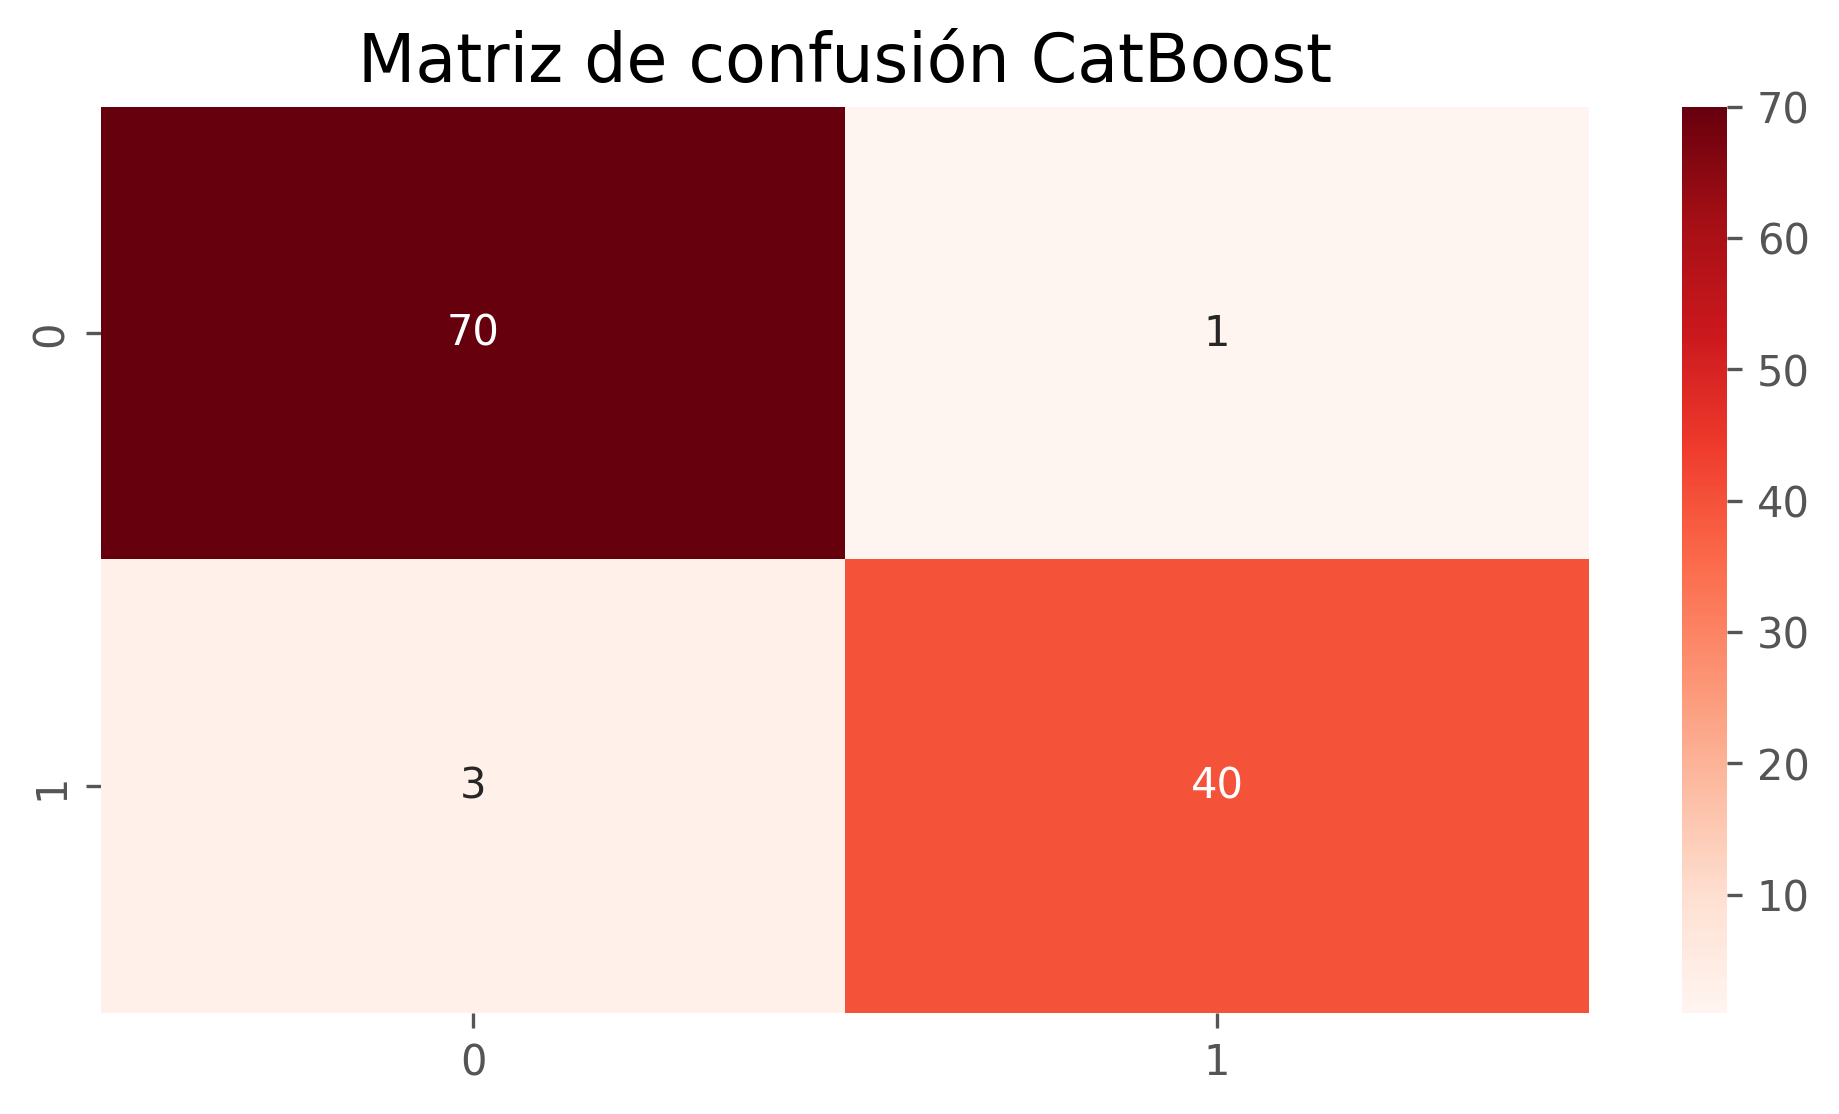

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize= (8,4),dpi=300)
plt.title("Matriz de confusión CatBoost", fontsize =16)
sns.heatmap(confusion_matrix(y_test, Y_cb), annot= True , cmap = 'Reds', fmt = '.0f')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test , Y_cb))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score
CatBoost_acc= accuracy_score(y_test, Y_cb)
print("Presicion del Modelo de CatBoot es:", CatBoost_acc)

Presicion del Modelo de CatBoot es: 0.9649122807017544


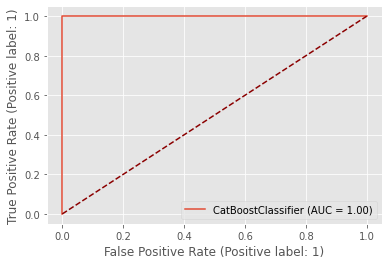

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cb , X_test, y_rfc)
plt.plot([0,1],[0,1], color='darkred' , linestyle ='--')

plt.show()

**Light GBM**

In [ ]:
from lightgbm import LGBMClassifier
lg= LGBMClassifier()
lg.fit(X_train, y_train)

Y_lg = lg.predict(X_test)

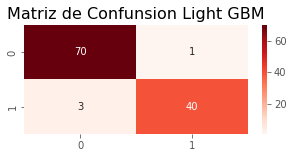

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confunsion Light GBM", fontsize= 16)
sns.heatmap(confusion_matrix(y_test, Y_lg), annot = True, cmap = 'Reds', fmt= '.0f')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_lg))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score
LGBM_acc= accuracy_score(y_test , Y_lg)
print("Precision del Modelo de Light GBM es:", LGBM_acc)

Precision del Modelo de Light GBM es: 0.9649122807017544


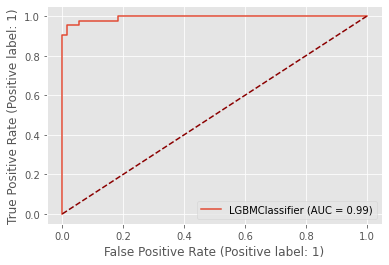

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lg, X_test, y_test)
plt.plot([0,1], [0,1], color= 'darkred', linestyle= '--')

plt.show()

**13) Artificial NEURAL NETWORKS(ANN)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

#Creacion de la ANN como secuencia de capas
ann = tf.keras.models.Sequential()

#Agregamos a la primera capa con 30 neuronas
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#Agregamos la 2da capa con 30 neuronas
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#Agregamos la capa de salida con 1 neurona 
ann.add(tf.keras.layers.Dense(units=1 , activation= 'sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early= EarlyStopping(monitor = 'accuracy', mode= 'max', patience = 25)

In [ ]:
ann.fit(X_train , y_train, batch_size= 32 , epochs = 400, callbacks = [early])

Epoch 1/400
15/15 [==============================] - 1s 2ms/step - loss: 0.8351 - accuracy: 0.5143
Epoch 2/400
15/15 [==============================] - 0s 3ms/step - loss: 0.5989 - accuracy: 0.6747
Epoch 3/400
15/15 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.7648
Epoch 4/400
15/15 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7956
Epoch 5/400
15/15 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8352
Epoch 6/400
15/15 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8813
Epoch 7/400
15/15 [==============================] - 0s 5ms/step - loss: 0.3374 - accuracy: 0.8637
Epoch 8/400
15/15 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.8967
Epoch 9/400
15/15 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9099
Epoch 10/400
15/15 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9077
Epoch 11/

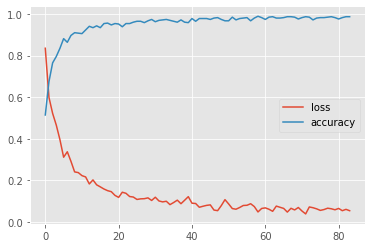

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_ann = ann.predict(X_test)
Y_ann = Y_ann > 0.5

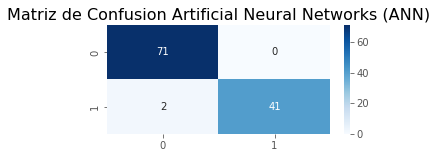

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(5,2))
plt.title("Matriz de Confusion Artificial Neural Networks (ANN)", fontsize = 16)
sns.heatmap(confusion_matrix(y_test , Y_ann ), annot= True, cmap = 'Blues', fmt= '.0f')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test , Y_ann))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.metrics import accuracy_score
ANN_acc= accuracy_score(y_test, Y_ann)
print("Presicion del Modelo de Artificial Neural Networks es:", ANN_acc)

Presicion del Modelo de Artificial Neural Networks es: 0.9824561403508771


In [ ]:
!pip install shap


     |████████████████████████████████| 564 kB 9.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score

import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import shap

shap.initjs()
%matplotlib inline

np.random.seed(3)

**Using SHAP values for XGBoost interpretability**

In [ ]:
data = pd.read_csv('data.csv')


In [ ]:
data['benign'] = (data.diagnosis == 'M').astype(int)

data['benign'].value_counts()

0    357
1    212
Name: benign, dtype: int64

In [ ]:
data.drop(['id', 'diagnosis'], axis=1, inplace=True)

features = [c for c in data.columns if c != 'benign']
target = 'benign'

X = data[features]
y = data[target]

In [ ]:
kfolds = KFold(n_splits=5, shuffle=True)


In [ ]:
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.2,
    'silent': 1,
    'nthreads': 2,
}

num_round = 10

thres = 0.5

In [ ]:
cnf = list()
auc = list()

for train_idx, test_idx in kfolds.split(X):
    x_train, Y_train = X.iloc[train_idx], y.iloc[train_idx]
    x_test, Y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    param['scale_pos_weight'] = (Y_train.size - Y_train.sum()) / Y_train.sum()    
    
    xg_train = xgb.DMatrix(
        x_train.values, feature_names=features, label=Y_train.values
    )
    xg_test = xgb.DMatrix(
        x_test.values, feature_names=features, label=Y_test.values
    )
    
    watchlist = [(xg_train, 'train'), (xg_test, 'test')]
    bst = xgb.train(param, xg_train, num_round, watchlist, verbose_eval=False)
    preds = bst.predict(xg_test)
    
    cnf.append(confusion_matrix(Y_test, (preds > thres).astype(int)))
    auc.append(roc_auc_score(Y_test, preds))

cnf = sum(cnf)
auc_acc = sum(auc) / len(auc)

print('Average AUC:', auc_acc)

Average AUC: 0.9841666171210462


Text(42.0, 0.5, 'Observation')

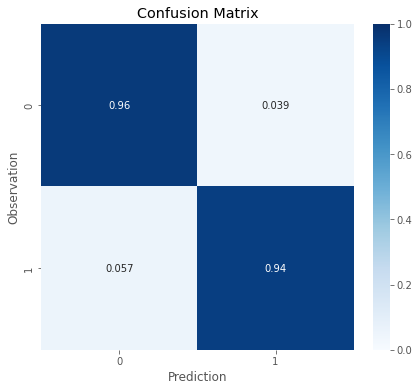

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))

normalized_cnf = cnf / cnf.sum(axis=1).reshape(-1, 1)

sns.heatmap(normalized_cnf, annot=True, cmap="Blues", ax=ax, vmin=0, vmax=1 )
ax.set_title('Confusion Matrix')
ax.set_xlabel('Prediction')
ax.set_ylabel('Observation')

In [ ]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)

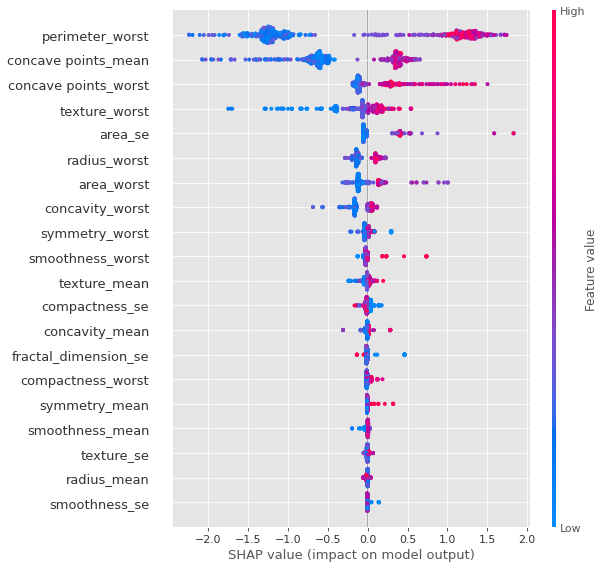

In [ ]:
shap.summary_plot(shap_values, X) 


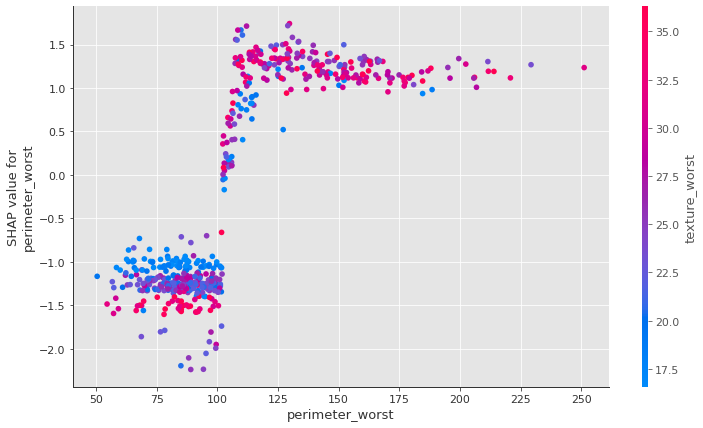

In [ ]:
shap.dependence_plot('perimeter_worst', shap_values, X, dot_size=32, show=False)

pl.gcf().set_size_inches(12, 7)

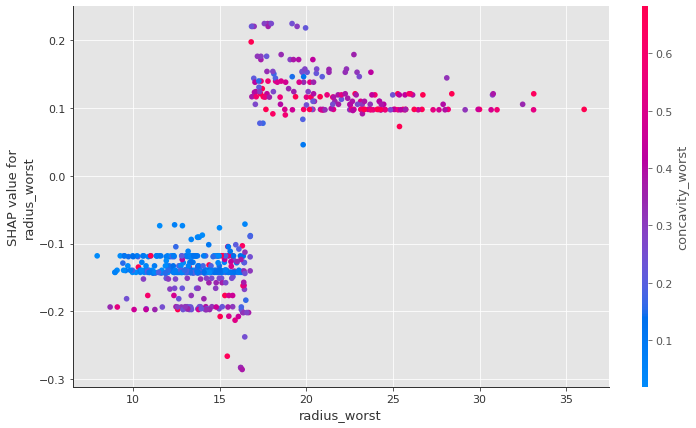

In [ ]:
shap.dependence_plot('radius_worst', shap_values, X, dot_size=32, show=False)

pl.gcf().set_size_inches(12, 7)

**Resultados**

In [ ]:
models= pd.DataFrame({
    'Model': ['Logistic_Regression', 'KNN', 'Decision Tree', 'Random_Forest', 'Support Vector Machine',
              'Naive Bayes', 'Gradient Boosting', 'Stochastic Gradient Decent', 
              'AdaBoost', 'XGboost','CatBoost', 'LightGBM', 'Neural','Shap_XGBoost'],
    'Accuracy': [logistica_acc , KNN_acc, Tree_acc, Random_Fores_acc, SVC_acc, Gaussian_acc, GrandientBoosting_acc, 
                           StochasticGradient_acc, AdaBoost_acc, xgboost_acc, CatBoost_acc, LGBM_acc, ANN_acc, auc_acc]})
models.sort_values(by= 'Accuracy', ascending= False)

,Model,Accuracy
13,Shap_XGBoost,0.984167
0,Logistic_Regression,0.982456
4,Support Vector Machine,0.982456
12,Neural,0.982456
8,AdaBoost,0.973684
3,Random_Forest,0.964912
6,Gradient Boosting,0.964912
9,XGboost,0.964912
10,CatBoost,0.964912
11,LightGBM,0.964912
